<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_4%EC%B0%A8%EC%8B%9C_%EB%8B%A4%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 출력 n개를 위한 가중치와 편향 행렬 구성  

[1] 가중치 행렬  
- 뉴런(Node)으로의 m개 입력 : x_1, x_2, x_3, ..., x_m (feature)  
- 출력 뉴런(Node)의 수는 n  
- 이때 각 입력에 대응하는 가중치(Weigh) 행렬 W는 아래와 같음  
w_11 w_12 ... w_1n  
w_21 w_22 ... w_2n  
...  
w_m1 w_m2 ... w_mn  
  
=> n개의 출력을 만들기 위해 W는 n개의 열을 가져야 함  
  
[2] 편향 벡터  
X= [x_1, x_2, ..., x_m]  
- 편향(Bias)의 수는 출력 뉴런의 수와 동일한 n개 필요  
B = [b_1, b_2, ...., b_n]  
- 각 입력과 가중치 곱의 합이 다음과 같이 n개 생성  
XW = [sum(from k=1 to m)(x_k * w_k1), sum(from k=1 to m)(x_k * w_k2), ..., sum(from k=1 to m)(x_k * w_kn)]  
[3] 최종 출력  
- 위 결과에 편향(Bias) B를 더한 결과는 아래와 같음  
U = [sum(from k=1 to m)(x_k * w_k1) + b_1, sum(from k=1 to m)(x_k * w_k2) + b_2, ..., sum(from k=1 to m)(x_k * w_kn) + b_n]  
- 위 결과에 활성화 함수 f를 적용하여 출력 Y를 구하면 다음과 같음  
Y = f(U)  
= [f(sum(from k=1 to m)(x_k * w_k1) + b_1), f(sum(from k=1 to m)(x_k * w_k2) + b_2), ..., f(sum(from k=1 to m)(x_k * w_kn) + b_n)]   
  
2. 완전 연결층 구현을 위한 알고리즘  
 [1] 완전 연결 계층  
  - 지금까지 결과 => 모든 입력이 출력으로 연결된 Fully Connected Layer(완전 연결 계층)를 구성  
 [2] 딥러닝 네트워크  
  - 출력 Y를 다음 층의 입력으로 사용  
   입력층(Input Layer), 은닉층(Hidden Layer), 출력층(Output Layer)  
  
3. 회귀를 위한 다층 신경망 구현 실습  
 [1] 회귀문제 신경망 구현  
  - 입력층 노드 : 2개  
  - 은닉층 노드 : 2개  
  - 출력층 노드 : 1개  
  - 은닉층 활성화함수 : 시그모이드  
  - 출력층 활성화 함수 : 항등함수  

뉴런으로의 입력 m개, 출력 n개일 때, 이에 적용할 가중치 행렬 W의 크기 : (m, n)  
뉴런으로의 입력 m개, 출력 n개일 때, 이에 적용할 편향 행렬 B의 크기 : (n)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 입력
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

In [3]:
# 출력
Z = np.zeros((10, 10))

In [5]:
# 가중치
w_im = np.array([[4.0, 4.0], [4.0, 4.0]])
w_mo = np.array([[1.0], [-1.0]])

In [6]:
# 편향
b_im = np.array([3.0, -3.0])
b_mo = np.array([0.1])

In [9]:
# 은닉층
def middle_layer(x, w, b):
  u = np.dot(x, w) + b
  return 1 / (1 + np.exp(-u))

In [10]:
# 출력층
def output_layer(x, w, b):
  u = np.dot(x, w) + b
  return u

In [14]:
for i in range(10):
  for j in range(10):
    inp = np.array([X[i], Y[j]]) # 입력층
    mid = middle_layer(inp, w_im, b_im) # 은닉층
    out = output_layer(mid, w_mo, b_mo) # 출력층
    Z[j][i] = out[0]

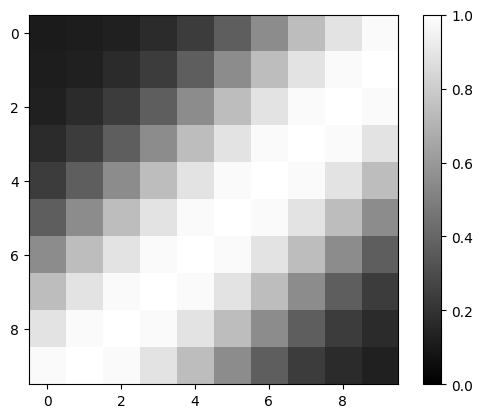

In [15]:
plt.imshow(Z, 'gray', vmin=0, vmax=1.0)
plt.colorbar()
plt.show()

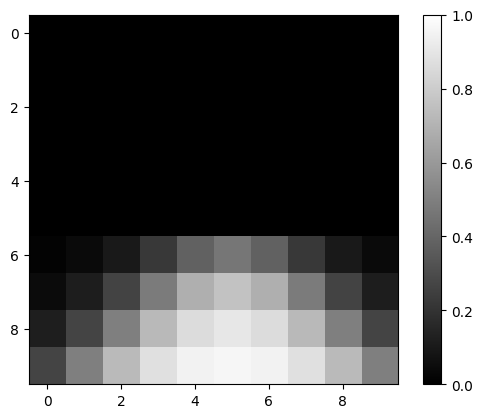

In [16]:
# 가중치값, 편향값 바꾸기 1
w_im = np.array([[-5.0, -5.0], [5.0, -5.0]])
w_mo = np.array([[1.0], [-1.0]])
b_im = np.array([0.0, 0.0])
b_mo = np.array([0.0])
for i in range(10):
  for j in range(10):
    inp = np.array([X[i], Y[j]]) # 입력층
    mid = middle_layer(inp, w_im, b_im) # 은닉층
    out = output_layer(mid, w_mo, b_mo) # 출력층
    Z[j][i] = out[0]
plt.imshow(Z, 'gray', vmin=0, vmax=1.0)
plt.colorbar()
plt.show()

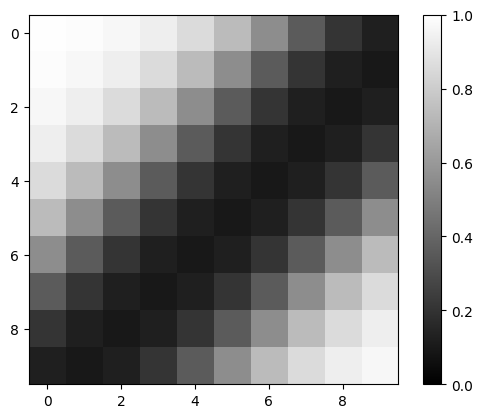

In [17]:
# 가중치값, 편향값 바꾸기 2
w_im = np.array([[4.0, 4.0], [4.0, 4.0]])
w_mo = np.array([[-1.0], [1.0]])
b_im = np.array([3.0, -3.0])
b_mo = np.array([1.0])
for i in range(10):
  for j in range(10):
    inp = np.array([X[i], Y[j]]) # 입력층
    mid = middle_layer(inp, w_im, b_im) # 은닉층
    out = output_layer(mid, w_mo, b_mo) # 출력층
    Z[j][i] = out[0]
plt.imshow(Z, 'gray', vmin=0, vmax=1.0)
plt.colorbar()
plt.show()